In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r'/Users/zayed/Documents/Data analysis projects/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


We can see that there is a mix of numerical and categorical variables. We will use the df.shape and df.info() to get more information. 

In [8]:
df.shape

(9994, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


There are 9994 rows and no nulls. The data type is correct. 

## Data cleaning

Before we start we must first clean the data to ensure that it is useable. 

**Handling missing values**

In [10]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

The dataset does not have any missing values. Now let's check for duplicates.     

In [11]:
df.duplicated().sum()

17

There are 17 duplicates. Let's check these observations out. 

In [12]:
df[df.duplicated(keep='last')]


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
568,Standard Class,Corporate,United States,Seattle,Washington,98105,West,Office Supplies,Paper,19.440,3,0.0,9.3312
591,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
935,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
1186,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
1479,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416
2803,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
2807,Second Class,Consumer,United States,Seattle,Washington,98115,West,Office Supplies,Paper,12.960,2,0.0,6.2208
2836,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
3127,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
3405,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588


Okay, now let's drop them. 

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.shape

(9977, 13)

The duplicate rows have been dropped.

## Calculated field

Let us now create some calculated fields so that we have useful data to work with. 

In [15]:
#Profit margin percentage
df['Profit Margin %'] = (df.Profit/df.Sales)*100
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


## Exploratory Data analysis
Let us now take a good look at the data in order to understand it better. 

In [16]:
# Get a summary of the dataset
df.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin %
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,12.011354
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,46.663769
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,-275.000000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,7.500000
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,27.000000
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,36.250000


What can we see here? 

- There are 4 ship modes and 3 customer segments. Nearly half of the orders are from Consumer segment in the Standard Class ship mode.
- The store carries 3 category of items with 17 sub categories. 60% of orders are for Office Supplies and of that 60%, at least 15% purchases are for Binders.

While for numerical parameters, it's interesting to note that:
- The mean profit is only 28$ while the mean sale is 230$. That means less than 10% of the average sale is profit, reflecting the low-margin nature of the supermarket industry. 
- Loss-making orders can go up to 275% losses. We must place emphasis on these loss making sales to reduce them.
We will perform some analysis below to test these observations.

We will perform some analsysis to investigate these observations. 

---

## Exploratory data analysis
### Which category is the best selling, and which is the most profitable? 

In [18]:
category_analysis = df.groupby('Category')[['Sales', 'Profit', 'Quantity']].sum()
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


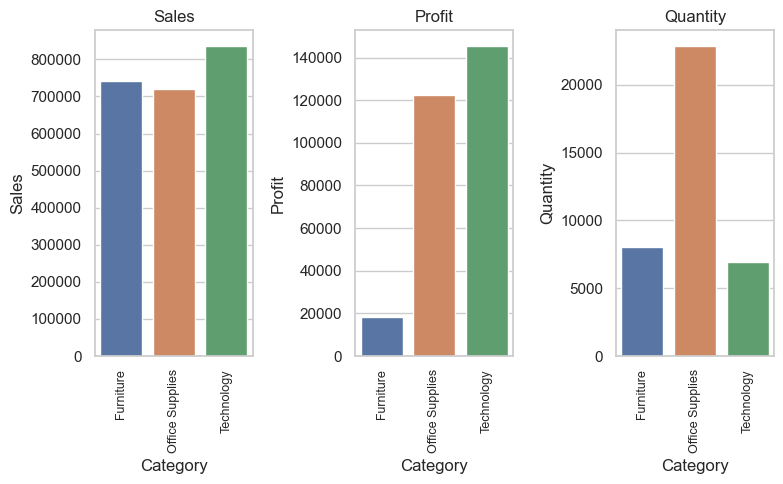

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

fig, axis = plt.subplots(1, 3, figsize=(8, 5))  # Creates 3 subplots in a row

plot1 = sns.barplot(x=category_analysis.index, y = category_analysis.Sales, hue=category_analysis.index,ax=axis[0])
plot2 = sns.barplot(x=category_analysis.index, y = category_analysis.Profit, hue=category_analysis.index,ax=axis[1])
plot3 = sns.barplot(x=category_analysis.index, y = category_analysis.Quantity,hue=category_analysis.index, ax=axis[2])

plot1.set(title = 'Sales')
plot2.set(title = 'Profit')
plot3.set(title = 'Quantity')

plt.setp(plot1.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(plot2.get_xticklabels(), rotation = 'vertical', size = 9)
plt.setp(plot3.get_xticklabels(), rotation = 'vertical', size = 9)

fig.tight_layout()

We can see that:
- All 3 categories - Furniture, Office Supplies and Technology make similar amount of sales.
- Technology is Best Selling and the Most Profitable too. These products are usually one-off purchases that can last at least a couple years.
- Although Furniture boasts a similar amount in sales as Technology does, it is the least profitable category and the quantity sold are the lowest too. 
- Office Supplies sells the most in terms of quantity as it is relatively cheap product. It also has pretty good profit margins, as it makes nearly as much profit as technology does. 

### What are the best selling and most profitable sub categories? 

In [50]:
subcatanalysis = df.groupby(['Category','Sub-Category'])[['Sales', 'Profit']].sum()

#Sort by descending order
subcat_sales = subcatanalysis.sort_values(by='Sales', ascending=False)
subcat_sales

Sales      Profit
Category        Sub-Category                         
Technology      Phones        330007.0540  44515.7306
Furniture       Chairs        327777.7610  26567.1278
Office Supplies Storage       223843.6080  21278.8264
Furniture       Tables        206965.5320 -17725.4811
Office Supplies Binders       203409.1690  30228.0003
Technology      Machines      189238.6310   3384.7569
                Accessories   167380.3180  41936.6357
                Copiers       149528.0300  55617.8249
Furniture       Bookcases     114879.9963  -3472.5560
Office Supplies Appliances    107532.1610  18138.0054
Furniture       Furnishings    91683.0240  13052.7230
Office Supplies Paper          78224.1420  33944.2395
                Supplies       46673.5380  -1189.0995
                Art            27107.0320   6524.6118
                Envelopes      16476.4020   6964.1767
                Labels         12444.9120   5526.3820
                Fasteners       3024.2800    949.5182

In [64]:
subcat_profit =subcatanalysis.sort_values(by='Profit', ascending=False)
subcat_profit

Sales      Profit
Category        Sub-Category                         
Technology      Copiers       149528.0300  55617.8249
                Phones        330007.0540  44515.7306
                Accessories   167380.3180  41936.6357
Office Supplies Paper          78224.1420  33944.2395
                Binders       203409.1690  30228.0003
Furniture       Chairs        327777.7610  26567.1278
Office Supplies Storage       223843.6080  21278.8264
                Appliances    107532.1610  18138.0054
Furniture       Furnishings    91683.0240  13052.7230
Office Supplies Envelopes      16476.4020   6964.1767
                Art            27107.0320   6524.6118
                Labels         12444.9120   5526.3820
Technology      Machines      189238.6310   3384.7569
Office Supplies Fasteners       3024.2800    949.5182
                Supplies       46673.5380  -1189.0995
Furniture       Bookcases     114879.9963  -3472.5560
                Tables        206965.5320 -17725.4811

In [ ]:
df.groupby(['Category','Sub-Category'])[['Sales', 'Profit', 'Profit Margin %']].sum().sort_values(by='Profit', ascending = False)

Sales      Profit  Profit Margin %
Category        Sub-Category                                          
Technology      Copiers       2198.941618  817.909190        31.719363
                Accessories    215.974604   54.111788        21.820968
                Phones         371.211534   50.073938        11.922197
Furniture       Chairs         532.971969   43.198582         4.396574
Office Supplies Appliances     230.755710   38.922758       -15.686934
Technology      Machines      1645.553313   29.432669        -7.202622
Office Supplies Envelopes       64.867724   27.418019        42.313976
                Storage        264.590553   25.152277         8.911348
                Paper           57.560075   24.977365        42.558131
                Binders        133.645972   19.860710       -19.857643
                Labels          34.283504   15.224193        42.952479
Furniture       Furnishings     95.902745   13.653476        13.690638
Office Supplies Art             34.096896    8.207059        25.162264
                Fasteners       13.936774    4.375660        29.917051
                Supplies       245.650200   -6.258418        11.203947
Furniture       Bookcases      503.859633  -15.230509       -12.664007
                Tables         648.794771  -55.565771       -14.772653

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_33237/685542185.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subcat1.set_xticklabels(subcat_sales.index.get_level_values('Sub-Category'), rotation='vertical', size = 10)
/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_33237/685542185.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  subcat2.set_xticklabels(subcat_profit.index.get_level_values('Sub-Category'), rotation= 'vertical', size = 10)


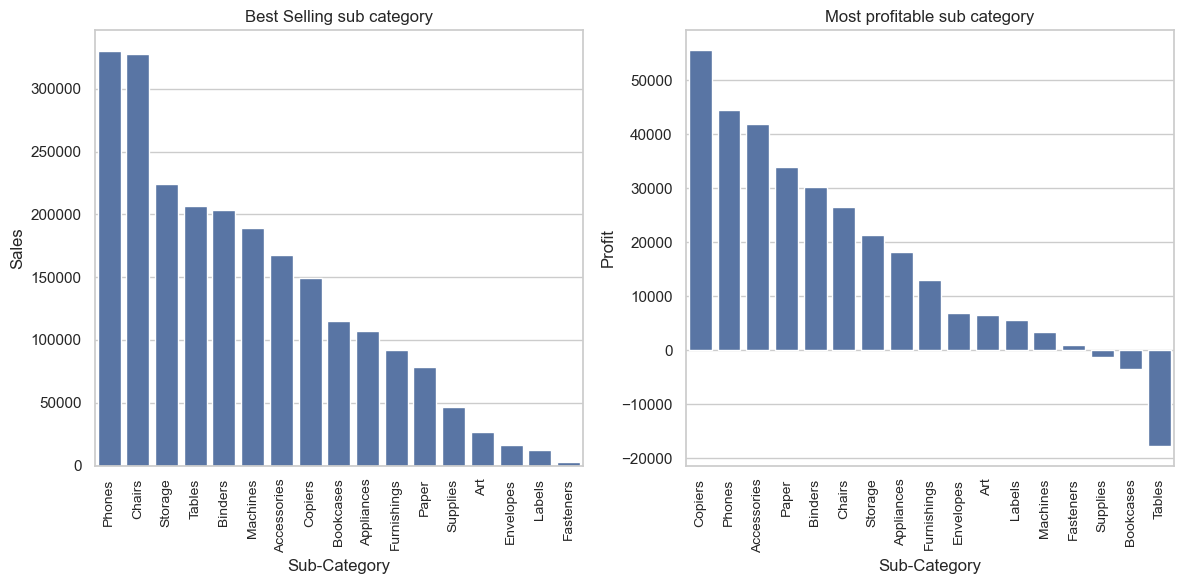

In [77]:
#plot bar plots
sns.set_theme(style='whitegrid')

fig, axis = plt.subplots(1,2,figsize = (12,6))

#bar plots for best selling sub categories
subcat1 = sns.barplot(data=subcat_sales, x = subcat_sales.index.get_level_values('Sub-Category'), y = subcat_sales.Sales, ax=axis[0])
subcat1.set_title('Best Selling sub category')
subcat1.set_xticklabels(subcat_sales.index.get_level_values('Sub-Category'), rotation='vertical', size = 10)

subcat2 = sns.barplot(data=subcat_profit, x = subcat_profit.index.get_level_values('Sub-Category'), y = subcat_profit.Profit, ax=axis[1])
subcat2.set_title('Most profitable sub category')
subcat2.set_xticklabels(subcat_profit.index.get_level_values('Sub-Category'), rotation= 'vertical', size = 10)

fig.tight_layout()

plt.show()

Let's analyse the bar plots:

- Phones and Chairs are Top 2 best selling sub-category.
- Copiers produces most profit, followed by Phones, Accessories, Papers and Binders. The marketing strategy has to focus on marketing these products.
- On the other end of the spectrum, Machines, Fasteners, Supplies, Bookcases and Tables make close to zero margin to losses. These are products that Super Store can consider dropping from the product catalogue or increase the sale price and profit margin or bargain for a lower price from the supplier.

### Which is the top selling sub category? 

In [79]:
subcat_quantity = df.groupby(['Sub-Category'])[['Quantity', 'Sales']].sum().sort_values(by='Quantity', ascending = False)
subcat_quantity

,Quantity,Sales
Sub-Category,,
Binders,5971,203409.1690
Paper,5144,78224.1420
Furnishings,3560,91683.0240
Phones,3289,330007.0540
Storage,3158,223843.6080
Art,2996,27107.0320
Accessories,2976,167380.3180
Chairs,2351,327777.7610
Appliances,1729,107532.1610


/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_33237/3701148977.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=subcat_quantity, y= subcat_quantity.index, x = subcat_quantity['Quantity'], palette='muted')


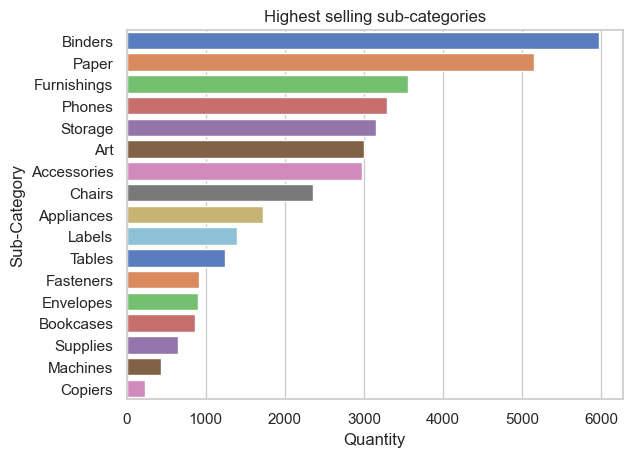

In [ ]:
#plot bar plot for top selling subcategories
sns.set_theme(style='whitegrid')
sns.barplot(data=subcat_quantity, y= subcat_quantity.index, x = subcat_quantity['Quantity'], palette='muted')
plt.title('Highest selling sub-categories')
plt.show()

Here, we can see that

- Super Store should ensure that they are always well stocked for the top selling sub-categories such as Binders, Paper, Furnishings and Phones.
- Despite being our most profitable sub category, Copiers are at the bottom of the list in terms of quanity. However, as it is an expensive office equipment that is usually used for few years, this observation becomes reasonable. 

### Which customer segment is most profitable? 

In [85]:
segment = df.groupby(['Segment'])[['Profit']].sum()
segment

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_33237/3214974051.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment, y= segment.index, x = segment.Profit, palette='rocket')


Text(0.5, 1.0, 'Customer segment by profitability')

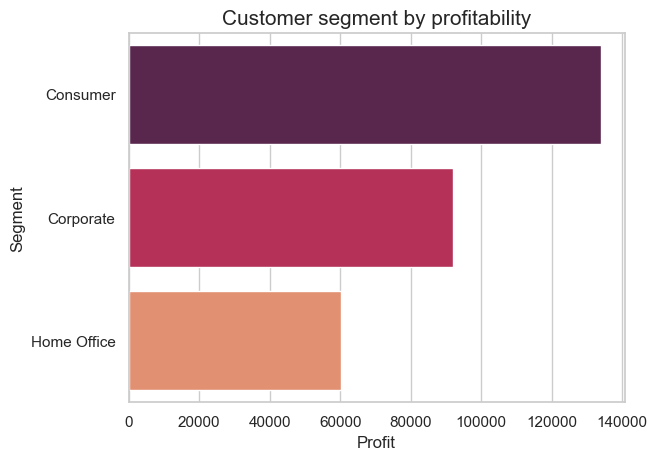

In [88]:
#plot bar plot for segments
sns.barplot(data=segment, y= segment.index, x = segment.Profit, palette='rocket')
plt.title('Customer segment by profitability', size = 15)

Consumer segment is most profitable, followed by Corporate Segment and Home Office. 
Hence, Super store's marketing strategy must target and focus on retaining Consumer and Corporate Segment customers.

### What is the preferred ship mode? 

In [92]:
shipmode = df.groupby('Ship Mode')[['Quantity']].sum().sort_value(by='Quantity')
shipmode

AttributeError: 'DataFrame' object has no attribute 'sort_value'

/var/folders/86/zs8qn3g56yq6zd_bf1g6h0c80000gn/T/ipykernel_33237/971913570.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipmode, x= shipmode.index, y= shipmode['Quantity'], palette='muted')


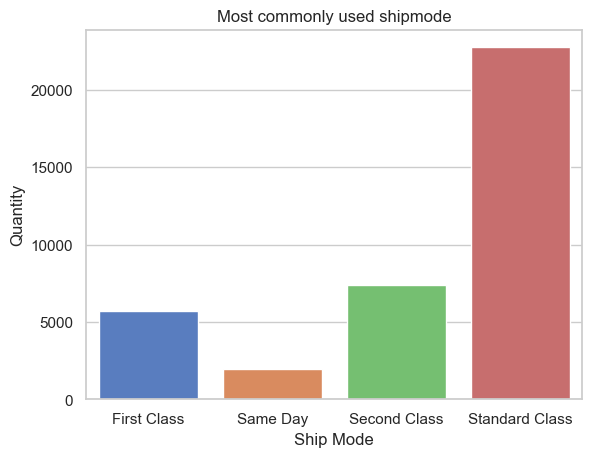

In [98]:
#plot bar plot
sns.set_theme(style='whitegrid')
sns.barplot(data=shipmode, x= shipmode.index, y= shipmode['Quantity'], palette='muted')
plt.title('Most commonly used shipmode')
plt.show()

By a landslide, Standard Class is the preferred method of shipment and probably the cheapest option. The other modes are not popular among the customers as they may be too costly.

### Which region is the most profitable? 

In [102]:
region = df.groupby('Region')[['Profit']].sum().reset_index()
region

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


Text(0.5, 1.0, 'Most Profitable by Region')

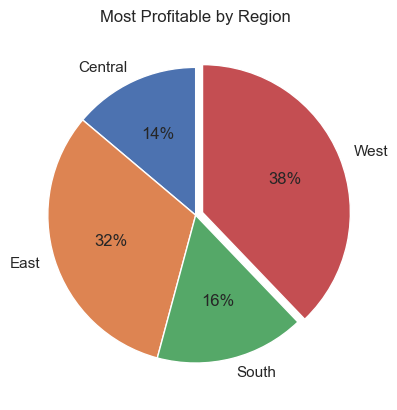

In [112]:
#plot pie chart
explode = [0, 0, 0, 0.05]
plt.pie(data=region, labels = region.Region, x =region.Profit, startangle=90, explode=explode, autopct="%1.0f%%")
plt.title("Most Profitable by Region")